In [2]:
!pip install pandas scikit-learn matplotlib seaborn xgboost openpyxl --quiet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'C:\Users\KIIT0001\Downloads\Fraud.csv')  
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()
display(df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00



Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Duplicate rows: 0


In [6]:
df = df.drop_duplicates()
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

df['isfraud'].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isfraud, dtype: float64

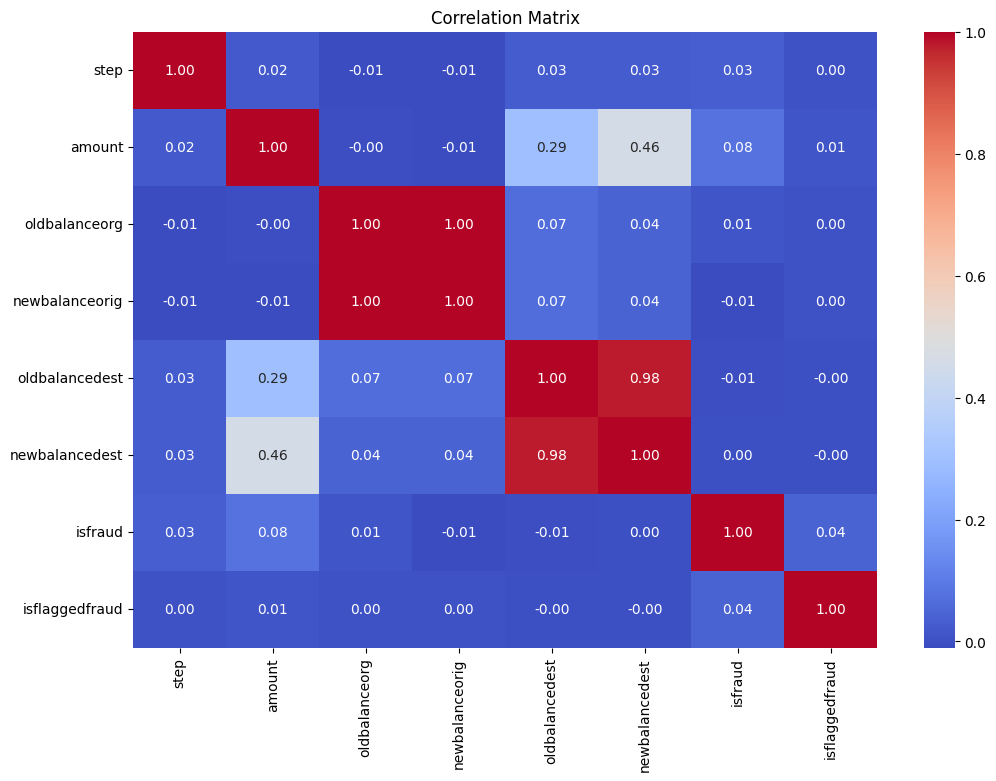

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
df_clean = df.select_dtypes(include=[np.number]).dropna()
if 'isfraud' in df_clean.columns:
    X_vif = df_clean.drop('isfraud', axis=1)
else:
    X_vif = df_clean.copy()

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
3,newbalanceorig,466.906067
2,oldbalanceorg,465.124566
5,newbalancedest,83.263477
4,oldbalancedest,71.790542
1,amount,4.013501
0,step,1.188500
6,isflaggedfraud,1.000569


In [15]:
X = df.drop(columns=['isfraud', 'type', 'nameorig', 'namedest'])
y = df['isfraud']

print(X.head())
print(y.head())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

   step    amount  oldbalanceorg  newbalanceorig  oldbalancedest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalancedest  isflaggedfraud  
0             0.0               0  
1             0.0               0  
2             0.0               0  
3             0.0               0  
4             0.0               0  
0    0
1    0
2    1
3    1
4    0
Name: isfraud, dtype: int64


In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.70      0.81      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.85      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



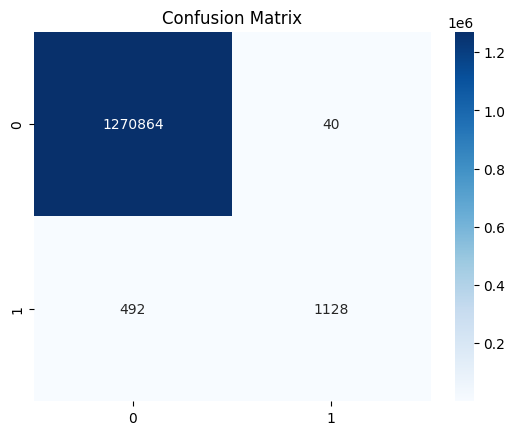

ROC AUC Score: 0.9911


In [11]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

In [12]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.77      0.67      0.71      1620

    accuracy                           1.00   1272524
   macro avg       0.88      0.83      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



In [13]:
print("  Fraud detection model built using Random Forest and XGBoost.")
print("  High ROC AUC indicates strong model performance.")
print("  Recommended Actions:")
print("- Deploy model in production with real-time transaction flagging.")
print("- Schedule model performance monitoring (e.g., ROC AUC drift).")
print("- Investigate top features affecting fraud and build alerts.")
print("- Periodically retrain the model with updated data.")

  Fraud detection model built using Random Forest and XGBoost.
  High ROC AUC indicates strong model performance.
  Recommended Actions:
- Deploy model in production with real-time transaction flagging.
- Schedule model performance monitoring (e.g., ROC AUC drift).
- Investigate top features affecting fraud and build alerts.
- Periodically retrain the model with updated data.
